In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/class.vision-master/images"
img = cv2.imread(f'{data_path}/color.png')  # aks ra be soorate BGR mikhanad.

Mounted at /content/drive


In [4]:
b,g,r = cv2.split(img)   #  Mohem
print(img.shape)
print(g.shape)

(208, 200, 3)
(208, 200)


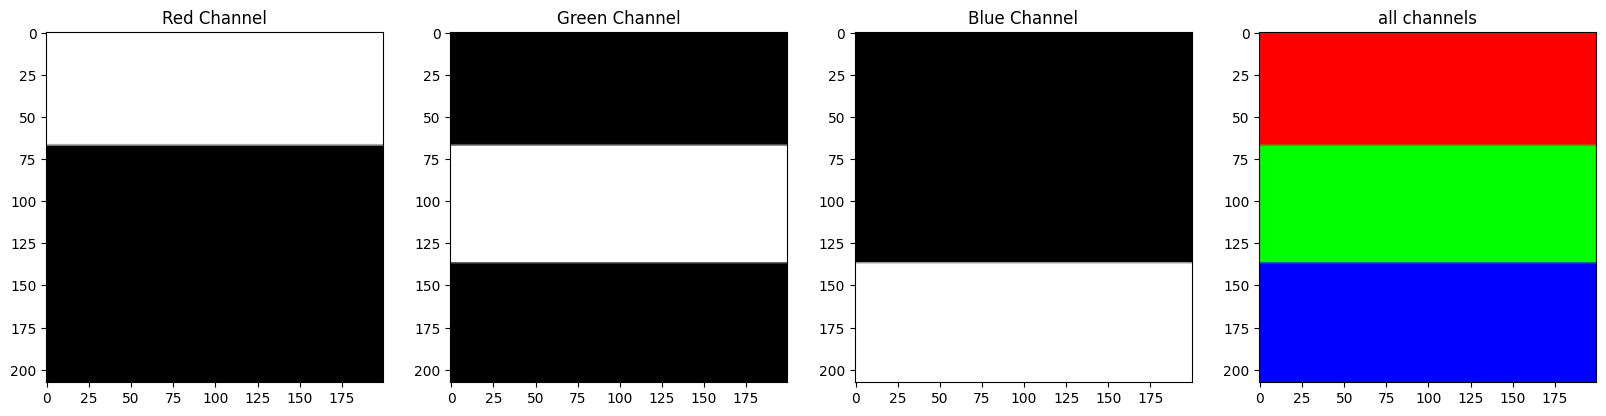

In [5]:
# Show the channels
plt.figure(figsize=[20,5]) # 20 width of entire plot and 5 length and width of each sub plot.
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(img[:,:,::-1]);plt.title("all channels");

In [6]:
img = cv2.imread(f'{data_path}/input.jpg')

In [7]:
b,g,r = cv2.split(img)  # Baraye joda sazi kanalha
print(img.shape)
print(g.shape)

(600, 800, 3)
(600, 800)


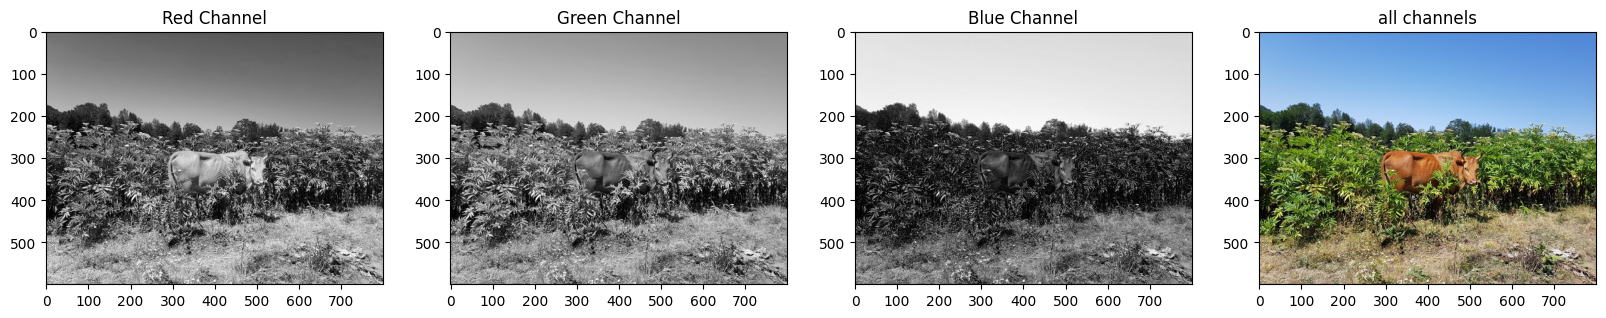

In [8]:
# Show the channels
plt.figure(figsize=[20,5]) # 20 width of entire plot and 5 length and width of each sub plot.
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(img[:,:,::-1]);plt.title("all channels");

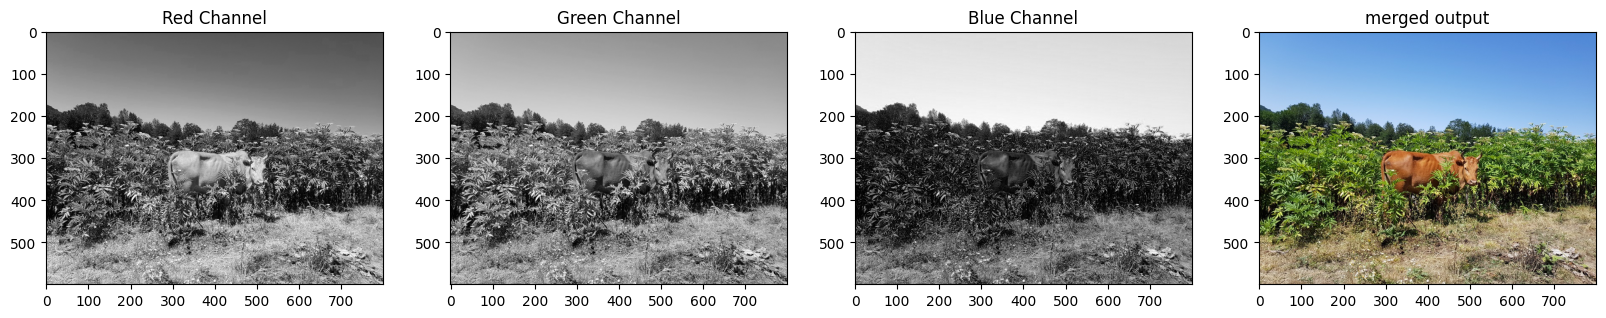

In [9]:
merged = cv2.merge([b,g,r])

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(merged[:,:,::-1]);plt.title("merged output");

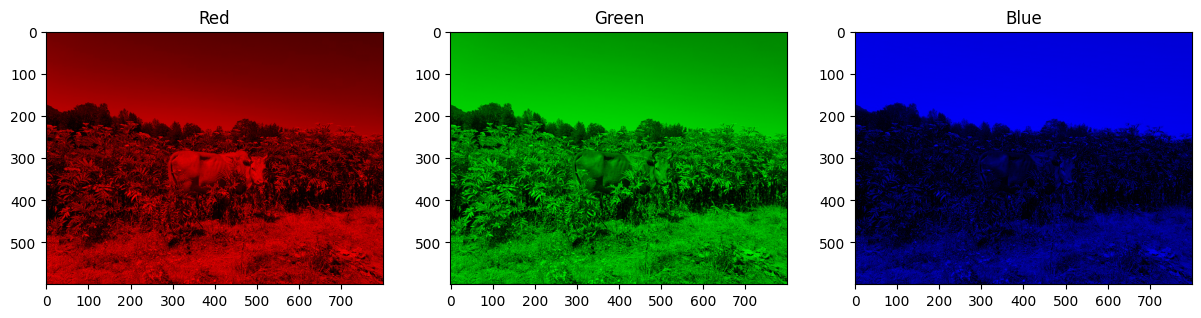

In [10]:
zeros = np.zeros_like(r, 'uint8')

red = cv2.merge([zeros, zeros, r])
green = cv2.merge([zeros, g, zeros])
blue = cv2.merge([b, zeros, zeros])

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(red[...,::-1],cmap='gray');plt.title("Red");
plt.subplot(142);plt.imshow(green[...,::-1],cmap='gray');plt.title("Green");
plt.subplot(143);plt.imshow(blue[...,::-1],cmap='gray');plt.title("Blue");



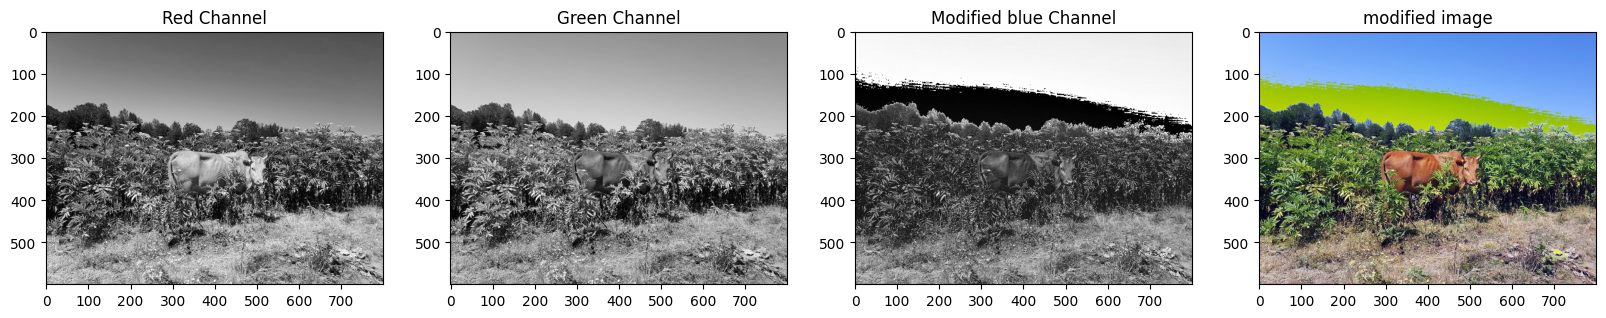

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Split the image into the B,G,R components
img = cv2.imread(f'{data_path}/input.jpg')
b,g,r = cv2.split(img)

# Let's re-make the original image,
modified_b = b+20
merged = cv2.merge([modified_b, g, r])
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(modified_b,cmap='gray');plt.title("Modified blue Channel");

# Show the original image
plt.subplot(144);plt.imshow(merged[:,:,::-1]);plt.title("modified image");

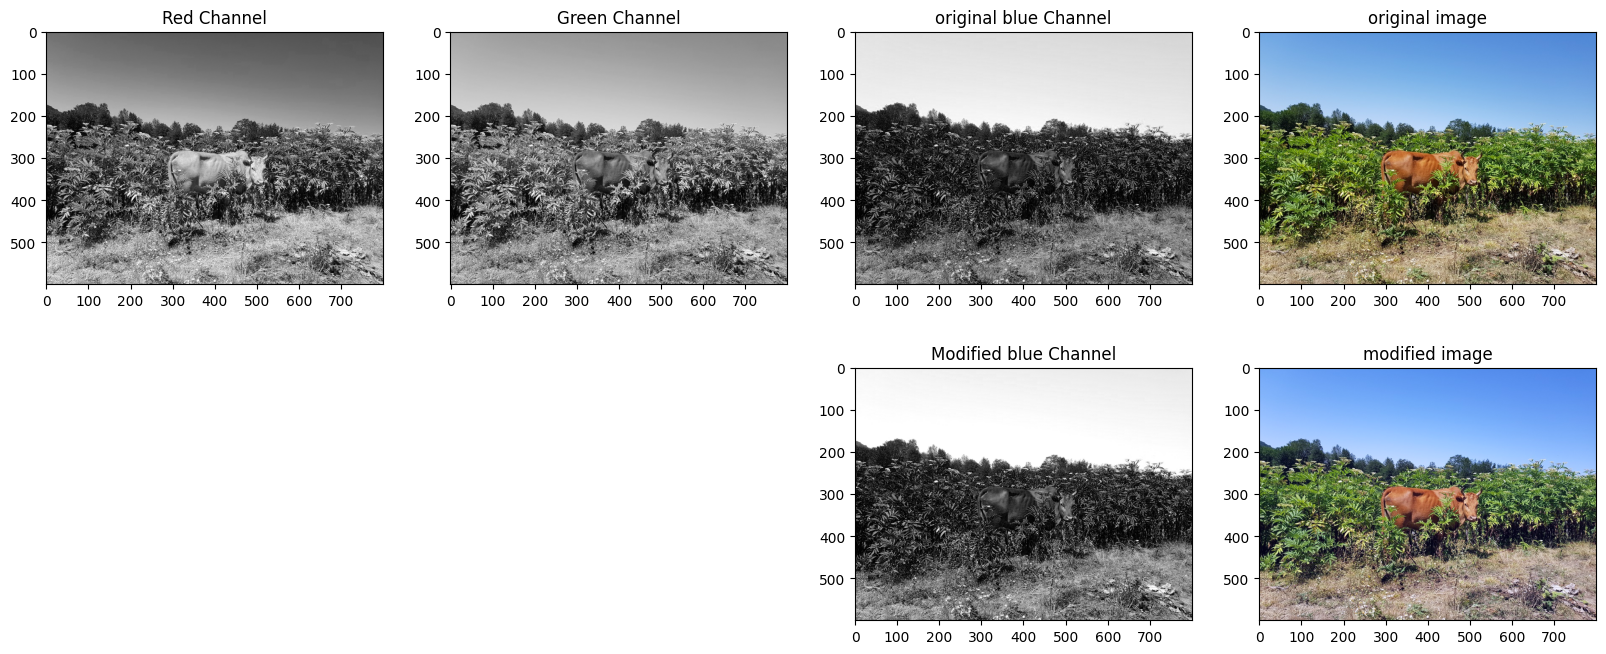

In [12]:
# Let's re-make the original image,
modified_b = b.astype('int16') + 20
modified_b = np.minimum(modified_b, 255)
modified_b = modified_b.astype('uint8')

merged = cv2.merge([modified_b, g, r])
# Show the channels
plt.figure(figsize=[20,8])
plt.subplot(241);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(242);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(243);plt.imshow(b,cmap='gray');plt.title("original blue Channel");
plt.subplot(244);plt.imshow(img[:,:,::-1]);plt.title("original image");

# Show the modified channel and image
plt.subplot(247);plt.imshow(modified_b,cmap='gray');plt.title("Modified blue Channel");
plt.subplot(248);plt.imshow(merged[:,:,::-1]);plt.title("modified image");

In [13]:
assert np.all(modified_b == cv2.add(b, 20))

In [14]:
#H: 0 - 180, S: 0 - 255, V: 0 - 255

from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread(f'{data_path}/input.jpg')
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Display the entire HSV image and its channels using cv2_imshow
cv2_imshow(hsv_image)
cv2_imshow(hsv_image[:, :, 0])  # Hue channel
cv2_imshow(hsv_image[:, :, 1])  # Saturation channel
cv2_imshow(hsv_image[:, :, 2])  # Value channel

cv2.waitKey(0)
cv2.destroyAllWindows()

Output hidden; open in https://colab.research.google.com to view.

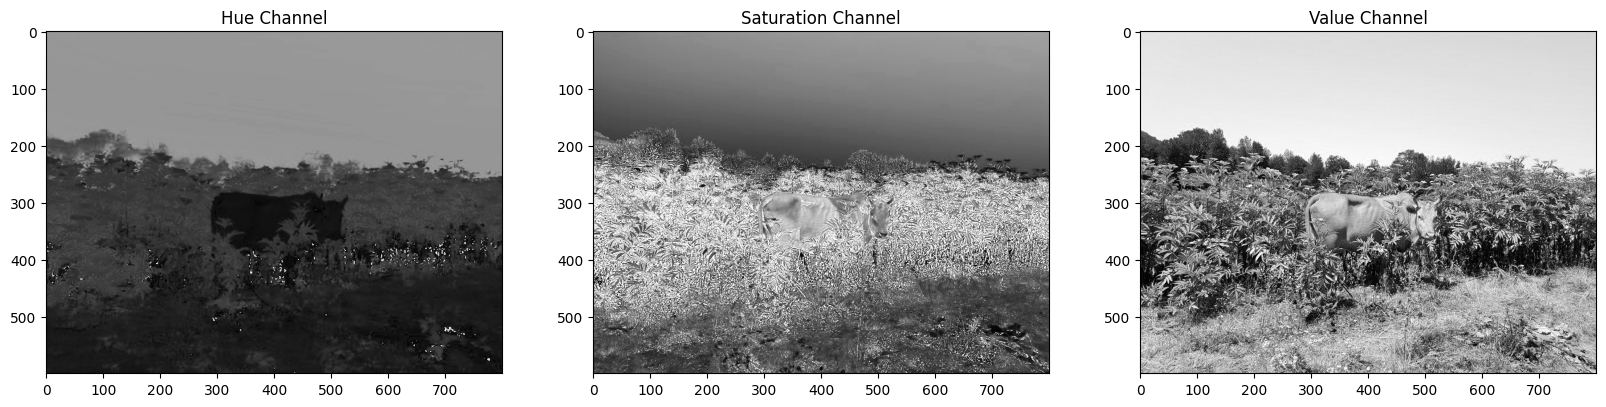

In [15]:
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(131);plt.imshow(hsv_image[:, :, 0],cmap='gray');plt.title("Hue Channel");
plt.subplot(132);plt.imshow(hsv_image[:, :, 1],cmap='gray');plt.title("Saturation Channel");
plt.subplot(133);plt.imshow(hsv_image[:, :, 2],cmap='gray');plt.title("Value Channel");


Text(0.5, 1.0, 'original image')

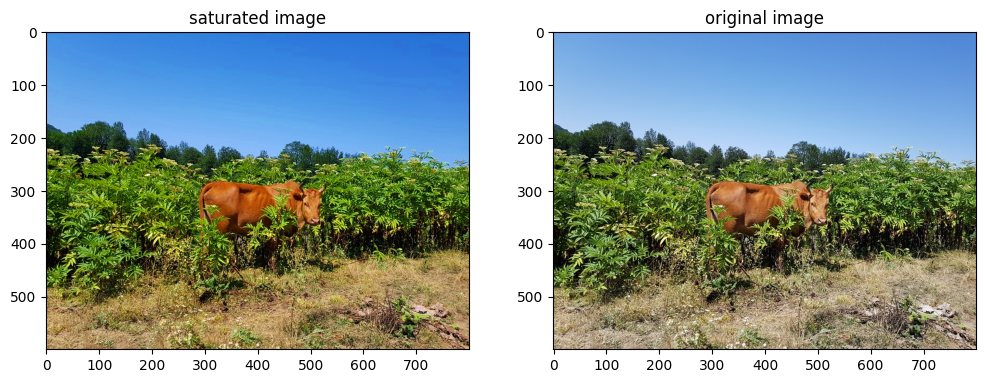

In [16]:
saturated_image = cv2.merge([hsv_image[:, :, 0], cv2.add(hsv_image[:, :, 1], 50), hsv_image[:, :, 2]])
saturated_image = cv2.cvtColor(saturated_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[12,5])

plt.subplot(121)
plt.imshow(saturated_image[...,::-1])
plt.title('saturated image')

plt.subplot(122)
plt.imshow(img[...,::-1])
plt.title('original image')



Text(0.5, 1.0, 'original image')

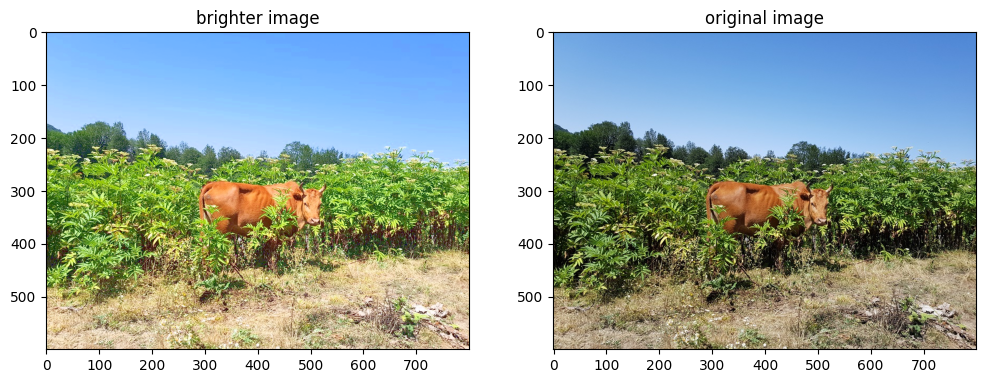

In [17]:
brighter_image = cv2.merge([hsv_image[:, :, 0], hsv_image[:, :, 1], cv2.add(hsv_image[:, :, 2], 50)])
brighter_image = cv2.cvtColor(brighter_image, cv2.COLOR_HSV2BGR)

plt.figure(figsize=[12,5])

plt.subplot(121)
plt.imshow(brighter_image[...,::-1])
plt.title('brighter image')

plt.subplot(122)
plt.imshow(img[...,::-1])
plt.title('original image')
